# Bike Sharing Assignment
## BoomBikes

#### Problem Statement:

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- It is required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.

### <font color= green>We can apply Linear Regression method to solve the problem statement.
`Steps involved as follows:`
    
1. Readnig and Understanding The Data
2. Visualising The Data
3. Data Preperation
4. Splitting the Data into Training and Testing Sets¶
5. Building a linear model
6. Residual Analysis of the train data
7. Making Predictions Using the Final Model
8. Model Evaluation

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
boombikes = pd.read_csv('boombikes.csv')

In [4]:
# Check the head of the dataset

boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


***`Inspect the various aspects of the dataframe`***

In [5]:
# identifying the number of rows and columns (initial rows= 730, initial columns= 16)

boombikes.shape

(730, 16)

In [6]:
# identifying the null values, data type etc.

boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# identifying the statistical summary of numerical variables/columns

boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# identifying the total list of columns

boombikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Identifying the data types of variables and drop the unnecessary columns
- By inspecting the dataset it was observed that `'season', 'mnth', 'weathersit' are categorical variables and remaining are binary/ continuous variables`.
- By inspecting the dataset it was observed that `‘instant’, ‘dteday’, ‘casual’ 'atemp' and ‘registered’ are unnecessary columns so they need to drop`

In [9]:
boombikes= boombikes.drop(['instant', 'dteday', 'casual', 'registered', 'atemp'], axis=1)
boombikes.shape  #  after droping now columns are 11

(730, 11)

In [10]:
# idnetfying the data types

boombikes.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

#### After inspecting the all columns it was observed that need to convert the data type as follows

#### `float to integer`<br>
i. temp <br>
ii. hum <br>
iii. windspeed <br>

In [11]:
# float to integer

boombikes['temp'] = boombikes['temp'].astype('int')
boombikes['hum'] = boombikes['hum'].astype('int')
boombikes['windspeed'] = boombikes['windspeed'].astype('int')
boombikes

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14,80,10,985
1,1,0,1,0,0,0,2,14,69,16,801
2,1,0,1,0,1,1,1,8,43,16,1349
3,1,0,1,0,2,1,1,8,59,10,1562
4,1,0,1,0,3,1,1,9,43,12,1600
...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10,65,23,2114
726,1,1,12,0,5,1,2,10,59,10,3095
727,1,1,12,0,6,0,2,10,75,8,1341
728,1,1,12,0,0,0,1,10,48,23,1796


In [12]:
# ensuring the conersion of data types

boombikes.dtypes

season        int64
yr            int64
mnth          int64
holiday       int64
weekday       int64
workingday    int64
weathersit    int64
temp          int32
hum           int32
windspeed     int32
cnt           int64
dtype: object

## Step 2: Visualising the Data

2.1. identifying the predictors which are directly having a strong association with the outcome variable

2.2. identifying the highest correlation with the target variable ('cnt').

We'll visualise our data using `matplotlib` and `seaborn` libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

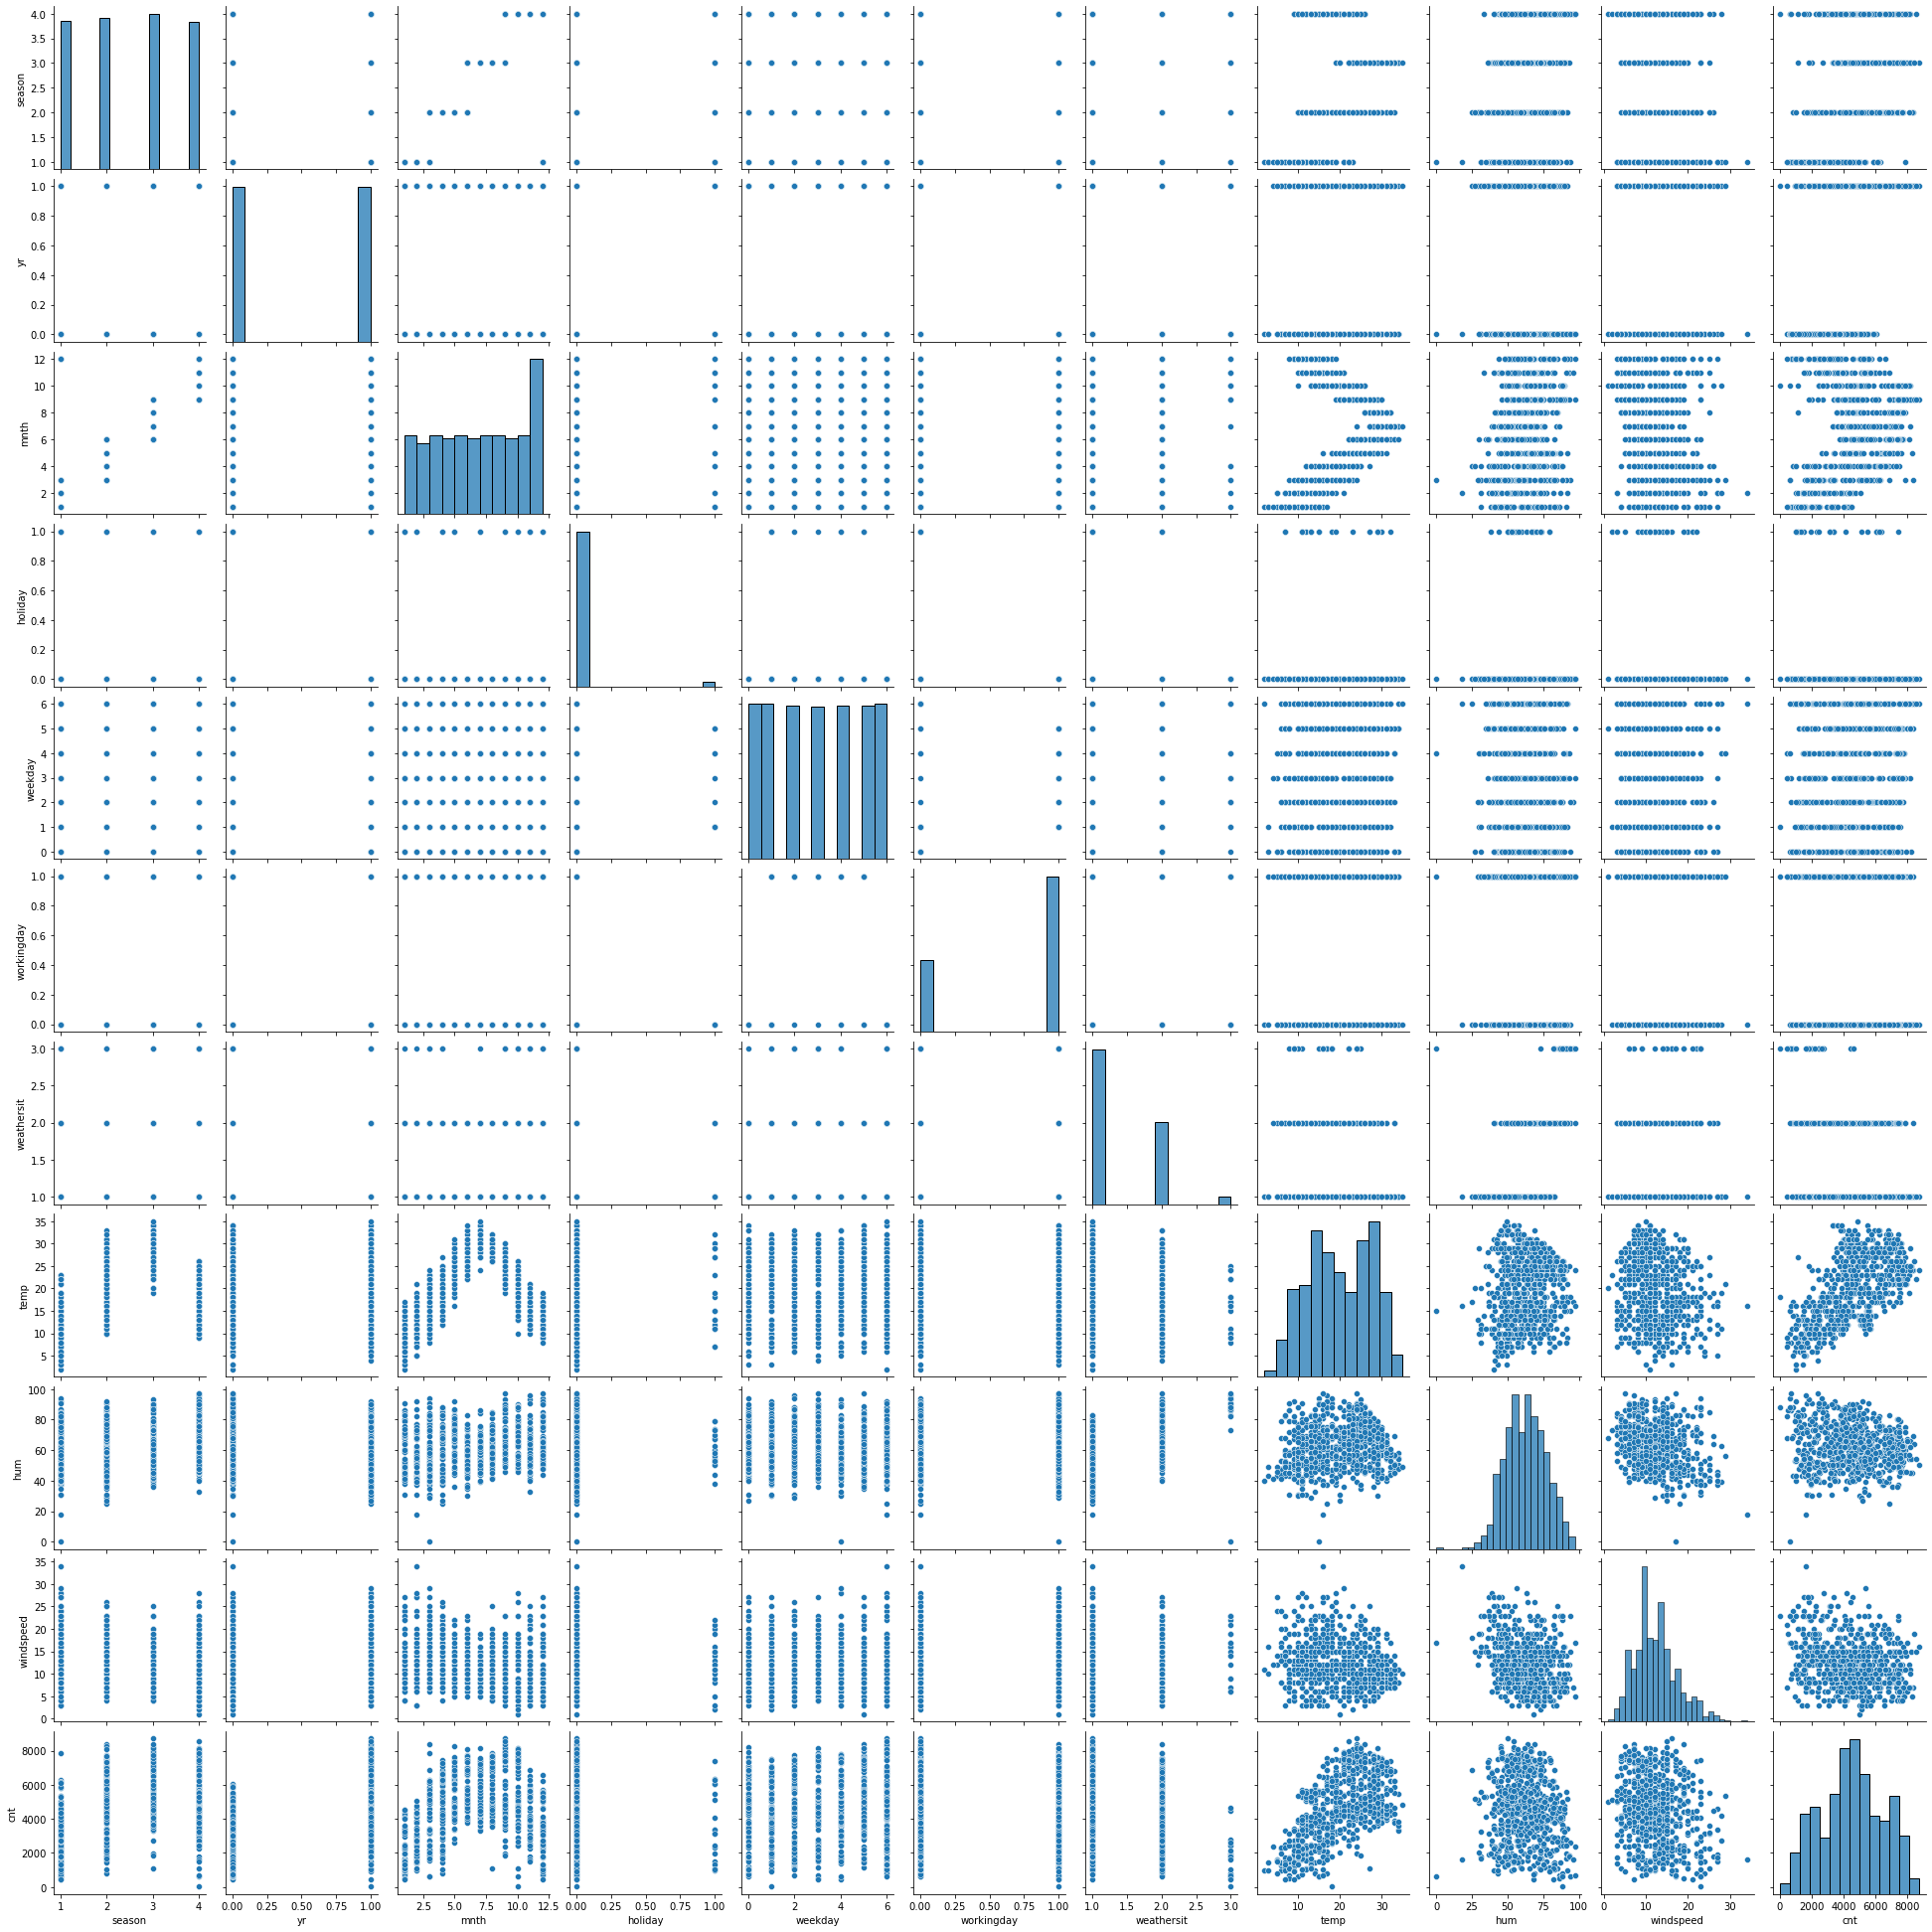

In [14]:
# visualising by pairplot

sns.pairplot(boombikes)
plt.show()

2.1. by inspecting the pair plot it was observed that 'temp', 'hum' and 'windspeed' are having a strong association with the target variable ('cnt')

### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

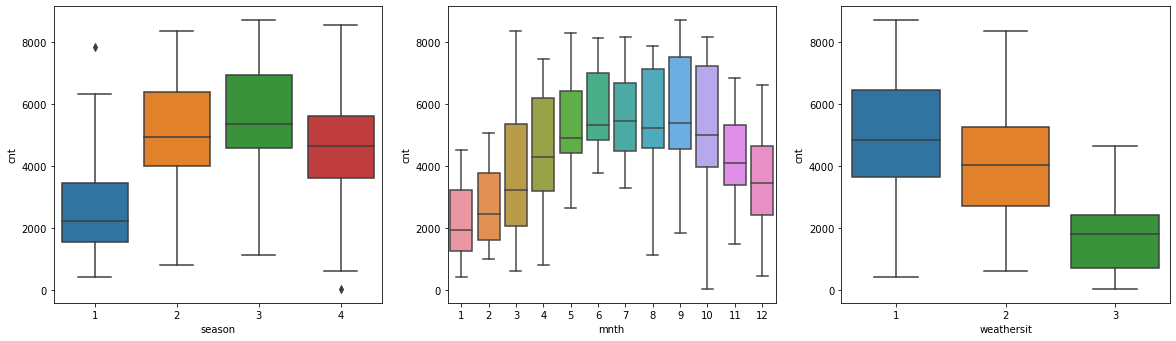

In [15]:
# Visualising using by boxplot

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = boombikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = boombikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = boombikes)
plt.show()

In [16]:
# checking the correlation

boombikes_corr = boombikes.corr()
boombikes_corr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.334818,0.210081,-0.228318,0.404584
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,-0.005466,-0.002945,-0.050322,0.049118,-0.112018,-0.013196,0.569728
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.220475,0.226726,-0.204921,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.027311,-0.015599,0.010227,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.001765,-0.052484,0.016130,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.052615,0.022733,-0.021135,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.118780,0.590318,0.037450,-0.295929
temp,3.348178e-01,4.911805e-02,2.204748e-01,-0.027311,-0.001765,0.052615,-0.118780,1.000000,0.129839,-0.156321,0.626290
hum,2.100813e-01,-1.120177e-01,2.267259e-01,-0.015599,-0.052484,0.022733,0.590318,0.129839,1.000000,-0.252148,-0.098060
windspeed,-2.283185e-01,-1.319642e-02,-2.049205e-01,0.010227,0.016130,-0.021135,0.037450,-0.156321,-0.252148,1.000000,-0.233517


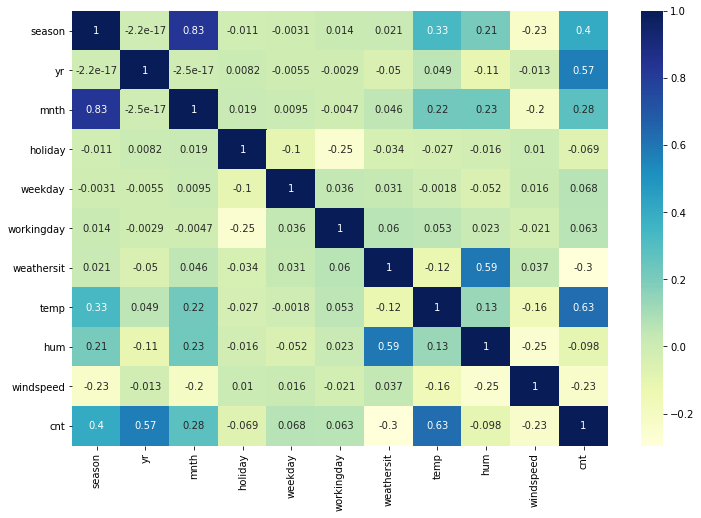

In [17]:
#ploting  the correlation between the variables.

plt.figure(figsize=(12,8))
sns.heatmap(boombikes_corr,annot=True,cmap="YlGnBu")
plt.show()

2.2. By inspecing the correlation between dependent variable and independent variables it was observed that 'temp' has a highest correletion with 'cnt' i.e. 0.63

## Step 3: Data Preparation

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s as follows:
- Before proceeding to covert them into dummies these are have lables asper data dictionary so first we have to map them accordingly   

In [18]:
varlist_0 = ['season'] 
boombikes[varlist_0]= boombikes[varlist_0].apply(lambda x: x.map({1:'spring', 2:'summer', 
                                                                  3:'fall', 4:'winter'}))

In [19]:
varlist_1 = ['mnth']
boombikes[varlist_1] = boombikes[varlist_1].apply(lambda x: x.map({1: 'jan', 2:'feb', 3:'mar', 4:'apr', 
                                                                   5:'may', 6:'jun', 7:'july', 8:'aug',
                                                                   9:'sep', 10:'oct', 11:'nov', 12:'dec'}))

In [20]:
varlist_2 = ['weekday'] 
boombikes[varlist_2] = boombikes[varlist_2].apply(lambda x: x.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 
                                                                   4:'thu', 5:'fri', 6:'sat'}))

In [21]:
varlist_3 = ['weathersit']
boombikes[varlist_3] = boombikes[varlist_3].apply(lambda x: x.map({1: 'Clear', 2: 'Mist', 
                                                                   3: 'Light Snow', 4: 'Heavy Rain'}))
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14,80,10,985
1,spring,0,jan,0,sun,0,Mist,14,69,16,801
2,spring,0,jan,0,mon,1,Clear,8,43,16,1349
3,spring,0,jan,0,tue,1,Clear,8,59,10,1562
4,spring,0,jan,0,wed,1,Clear,9,43,12,1600


In [22]:
boombikes_dummy = pd.get_dummies(boombikes[['season','mnth','weekday','weathersit']],drop_first=True)
boombikes_dummy.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


- If we have n categories we need to dummify n-1 categories because model efficiency increases and Time complexity is less. So here we drop the first one

In [23]:
# Add the results to the original dataframe i.e. boombike
# after merging dummified columns with original dataframe, now columns are 33

boombikes = pd.concat([boombikes, boombikes_dummy], axis = 1)
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
0,spring,0,jan,0,sat,0,Mist,14,80,10,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Mist,14,69,16,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear,8,43,16,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8,59,10,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear,9,43,12,...,0,0,0,0,0,0,0,1,0,0


In [24]:
# droping the columns which are dummified

boombikes.drop(['season', 'mnth', 'weekday', 'weathersit' ], axis = 1, inplace = True)

In [25]:
boombikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14,80,10,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14,69,16,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8,43,16,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8,59,10,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9,43,12,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# after droping the columns which are dummified, now colmuns are 29

boombikes.shape

(730, 29)

## Step 4: Splitting the Data into Training and Testing Sets

the first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split

# Here We specify that for training data points are 70% and testing 30% as below;
np.random.seed(0)
boombikes_train, boombikes_test = train_test_split(boombikes, train_size = 0.7, 
                                                   test_size = 0.3, random_state = 100)
print(boombikes_train.shape)
print(boombikes_test.shape)

(510, 29)
(219, 29)


In [28]:
# statistical summary of dataframe 

boombikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,19.601961,62.633333,12.329412,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,7.429062,14.152997,5.295336,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.000000,52.000000,9.000000,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.000000,63.000000,12.000000,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.000000,73.000000,15.000000,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.000000,97.000000,34.000000,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### `Rescaling the Features` 

- Here we can see that 'temp', 'hum', 'windspeed', 'cnt' are having highest vaues compared to other columns. So it is extremely important to rescale the variables so that they have a comparable scale.

- <font color= red> If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

- <font color= green>here we are applied `Min-Max scaling` 

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
# instantiate an object

scaler = MinMaxScaler()

In [31]:
# Apply scaler() to the columns as follows

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

boombikes_train[num_vars] = scaler.fit_transform(boombikes_train[num_vars]) # here we are instantiating fit_transform that means
# it will fit(learnn min and max values) the sacler and transform (compute the to minmax scaler) 

In [32]:
boombikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
653,1,0,1,0.515152,0.567010,0.31250,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.818182,0.721649,0.28125,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.424242,0.639175,0.25000,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.242424,0.494845,0.65625,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.393939,0.494845,0.18750,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
boombikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.533393,0.645704,0.322794,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225123,0.145907,0.165479,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.536082,0.218750,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.649485,0.312500,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.752577,0.406250,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing the datframe into X and Y sets for traning the model accordingly select the target variable

In [34]:
y_train = boombikes_train.pop('cnt') #pop out 'price' from data set
X_train = boombikes_train

### Step 5: Building the model
- Here we are using mixed approach (RFE) to build the model.

- This time, we will be using the **LinearRegression function from SciKit Learn library** for its compatibility with RFE (which is a utility from sklearn)

In [35]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
# list out the features which are selected by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 11),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 13),
 ('mnth_july', True, 1),
 ('mnth_jun', False, 8),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 3),
 ('mnth_nov', False, 10),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 14),
 ('weekday_wed', False, 9),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [38]:
# Filter the features which are by ranking

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_july',
       'mnth_oct', 'mnth_sep', 'weekday_sat', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [39]:
# view the features which are not seleted by RFE

X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'weekday_mon', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

### Building the model using statsmodel, for the detailed statistics summary

In [40]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [41]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [42]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model_1

In [43]:
#Let's see the summary of our linear model

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          4.58e-191
Time:                        20:11:40   Log-Likelihood:                 519.17
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -938.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

- By inspecting the statistical summary of linear model, it was observed that "holiday" has highest p-value i.e. 0.036. So we need to drop that column for better model.

In [44]:
X_train_new = X_train_rfe.drop(["holiday"], axis=1)

In [45]:
X_train_new.shape

(510, 15)

In [46]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_july',
       'mnth_oct', 'mnth_sep', 'weekday_sat', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [47]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [48]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model_2

In [49]:
#Let's see the summary of our linear model

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          2.88e-191
Time:                        20:11:40   Log-Likelihood:                 516.90
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

- By inspecting the statistical summary of linear model, it was observed that "oct" has highest p-value i.e. 0.021. So we need to drop that column for better model.

In [50]:
X_train_new = X_train_new.drop(["mnth_oct"], axis = 1)

In [51]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_july',
       'mnth_sep', 'weekday_sat', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [52]:
X_train_new.shape

(510, 14)

In [53]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [54]:
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model_3

In [55]:
#Let's see the summary of our linear model

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          2.83e-191
Time:                        20:11:41   Log-Likelihood:                 514.13
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

- By inspecting the statistical summary of linear model, it was observed that "spring" has highest p-value i.e. 0.004. So we need to drop that column for better model.

In [56]:
X_train_new = X_train_new.drop(["season_spring"], axis = 1)

In [57]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_july', 'mnth_sep',
       'weekday_sat', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [58]:
X_train_new.shape

(510, 13)

In [59]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [60]:
lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model_4

In [61]:
#Let's see the summary of our linear model

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.6
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          1.14e-190
Time:                        20:11:42   Log-Likelihood:                 509.88
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     497   BIC:                            -938.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

- By inspecting the statistical summary of linear model, it was observed that "july" has highest p-value i.e. 0.018. So we need to drop that column for better model.

In [62]:
X_train_new = X_train_new.drop(["mnth_july"], axis = 1)

In [63]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sat',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [64]:
X_train_new.shape

(510, 12)

In [65]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [66]:
lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model_5

In [67]:
#Let's see the summary of our linear model

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     239.0
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          1.17e-190
Time:                        20:11:42   Log-Likelihood:                 507.01
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     498   BIC:                            -939.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

- The statistical summary shown that all p-values for respected variables are '0' now we are applying mixed approch by `VIF` method

In [68]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [69]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.99
2,temp,8.07
1,workingday,4.52
4,windspeed,3.86
10,weathersit_Mist,2.10
0,yr,2.02
8,weekday_sat,1.78
6,season_winter,1.66
5,season_summer,1.58
7,mnth_sep,1.20


- By inspecting the VIF of linear model, it was observed that "hum" has greater than of VIF value 5.  i.e. 15.99. So we need to drop that column for better model.

In [70]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [71]:
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_sep', 'weekday_sat', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [72]:
X_train_new.shape

(510, 10)

In [73]:
# Adding a constant variable 

import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [74]:
lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model_6

In [75]:
#Let's see the summary of our linear model

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     252.2
Date:                Sun, 10 Jan 2021   Prob (F-statistic):          6.28e-188
Time:                        20:11:43   Log-Likelihood:                 497.68
No. Observations:                 510   AIC:                            -973.4
Df Residuals:                     499   BIC:                            -926.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [76]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.54
0,yr,2.02
7,weekday_sat,1.69
4,season_summer,1.57
9,weathersit_Mist,1.53
5,season_winter,1.40
6,mnth_sep,1.20
8,weathersit_Light Snow,1.08


## Step- 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [77]:
y_train_pred = lm_6.predict(X_train_lm)

In [78]:
# Importing the required libraries for plots.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

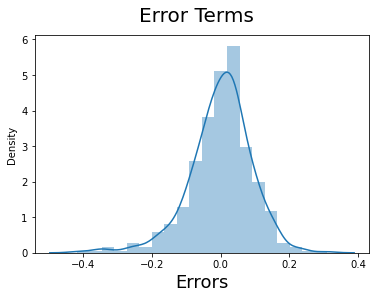

In [79]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- By observing the distplot, the error terms are normally distributed.assumptions of linear regression is valid

## Step-7: Making Predictions using the final Model (Model_6)

#### Applying the scaling on the test sets

In [80]:
# Apply scaler() to the columns as follows

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

boombikes_test[num_vars] = scaler.transform(boombikes_test[num_vars])
boombikes_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.818182,0.649485,0.09375,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.909091,0.608247,0.15625,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.515152,0.835052,0.34375,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.878788,0.432990,0.34375,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.818182,0.309278,0.53125,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
boombikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.554033,0.633950,0.315639,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233272,0.148943,0.155269,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.030303,0.257732,-0.031250,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.520619,0.218750,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545455,0.618557,0.312500,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757576,0.742268,0.406250,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.969697,1.000000,0.781250,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing into X_test and y_test

In [82]:
# here the prediting variable is cnt so we have to pop out that

y_test = boombikes_test.pop('cnt')
X_test = boombikes_test

In [83]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test 
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [84]:
# predicting the variable by using model_6

y_pred = lm_6.predict(X_test_new)

## Step-8: Model Evaluation

Text(0, 0.5, 'y_pred')

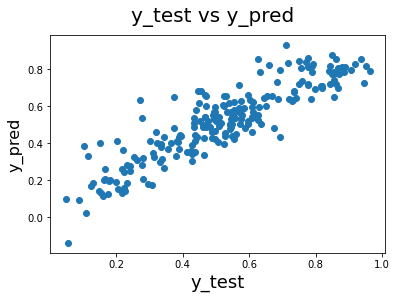

In [85]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ cnt = 0.078  \times  yr + 0.232  \times  workingday + 0.057 \times temp + 0.551 \times windspeed - 0.156 \times season_summer + 0.087 \times season_winter + 0.130 \times mnth_sep + 0.097 \times weekday_sat + 0.068 \times weathersit_lightsnow - 0.289 \times weathersit_mist - 0.081 $


### Evaluating the r_squared value by using y_test and y_pred

In [86]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
r_squared

0.791947537823636

#### The following can be observed from the above analysis:

- #### The R2 of test_data is `0.792` or `79.2 %` 
- #### The difference between train_data and  test_data (83.5% -79.2%) is `4.3 %`
- #### The data is well trained and best fitted as the difference between traing and testing data set<br> is less than `5 %`

### Thank You